In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# data_df = pd.read_csv("../results/results_500_RandomSavingChange.csv")
data_df = pd.read_csv("../results/results_10.csv") 
# data_df = pd.read_csv("../results/results_zmian_Adam_100.csv") 


data_df = data_df.drop(columns=['numberOfSteps','numberOfCheckedResults','timeOfRunningInMs'])
data_df


,setName,algName,nOfCities,iterationNumber,initialResult,finalResult,optimalResult,resultPermutation
0,ftv170,Steepest,171,0,27904,6636,2755,15|159|16|112|113|130|138|135|137|136|129|9|10...
1,ftv170,Steepest,171,1,26960,7278,2755,129|146|145|147|137|128|135|138|139|152|142|14...
2,ftv170,Steepest,171,2,26829,7224,2755,29|30|31|32|11|12|23|26|27|28|25|150|160|151|1...
3,ftv170,Steepest,171,3,27174,7085,2755,58|57|65|96|100|101|123|162|120|121|117|118|11...
4,ftv170,Steepest,171,4,26583,6761,2755,50|79|80|110|93|89|88|70|57|62|63|64|56|53|44|...
...,...,...,...,...,...,...,...,...
495,br17,RandomWalk,17,5,283,66,39,0|8|16|7|14|4|3|5|10|12|15|6|11|1|13|9|2|
496,br17,RandomWalk,17,6,347,63,39,7|8|16|1|13|2|12|10|15|3|4|5|14|9|11|6|0|
497,br17,RandomWalk,17,7,240,64,39,12|1|8|16|7|4|3|14|15|0|13|9|2|10|5|6|11|
498,br17,RandomWalk,17,8,285,58,39,9|16|3|4|5|6|15|14|0|2|12|13|1|10|11|8|7|


In [91]:
test_list1 = [[1,2],[2,3],[4,5],[3,1]]
test_list2 = [[3,1],[1,2],[2,3],[4,5]]

def get_pairs(num_list):
    end_list = []
    for l in range(len(num_list)-1):
        end_list.append([num_list[l],num_list[l+1]])
    end_list.append([num_list[len(num_list)-1],num_list[0]])
    return end_list

def compare_pairs(num_list,num_list2):
    counter = 0
    max_val = len(num_list)
    for i in num_list:
        if i in num_list2:
            counter+=1
    return counter/max_val

# get_pairs(test_list)
compare_pairs(test_list1,test_list2)

1.0

In [92]:
data_df['results_list'] = data_df.resultPermutation.apply(lambda x: x[0:-1].split('|'))
data_df['list_pairs'] =data_df.results_list.apply(lambda x: get_pairs(x))
set_names = data_df.setName.unique()
alg_names = data_df.algName.unique()
set_names
indexes  = []
best_results_for_set = {}
for setN in set_names:
    tmp = data_df.loc[data_df['setName'] == setN]
    idx =tmp['finalResult'].idxmin()
    val = data_df.iloc[idx]
    best_results_for_set[setN] = val['list_pairs']
    print(setN,idx)
#     data_df =data_df.drop(index=idx)
#     data_df.drop(index=idx)

    

ftv170 22
ry48p 71
ftv33 103
rbg403 151
ft53 224
rbg443 264
ft70 320
kro124p 379
p43 417
br17 453


In [93]:
## do obliczania podobieństwa    
# for index, row in data_df.iterrows():
#     data_df.at[index,'similarity'] = compare_pairs(row['list_pairs'],best_results_for_set[row['setName']])
#     if(data_df.at[index,'similarity'] ==1):
#         print(index,row.algName)
#         data_df = data_df.drop(index=index)
#     data_df.at[index,'quality'] = (row['finalResult'] - row['optimalResult'])/ row['optimalResult']


In [94]:
# do obliczania podobieństwa  std i mean  

dict_for_sets = {}
for sets in set_names:
    print(sets)
    dict_for_alg = {}
    for alg in alg_names:        
        temp_alg = []
        for index1, row1 in data_df[(data_df['setName']==sets) & (data_df['algName']==alg)].iterrows():
            
            
            for index2, row2 in alg_data.iterrows():
                if index1 != index2:
                    temp_alg.append(compare_pairs(row1['list_pairs'],row2['list_pairs']))

        dict_for_alg[alg] = temp_alg
    dict_for_sets[sets] = dict_for_alg
    



ftv170
ry48p
ftv33
rbg403
ft53
rbg443
ft70
kro124p
p43
br17


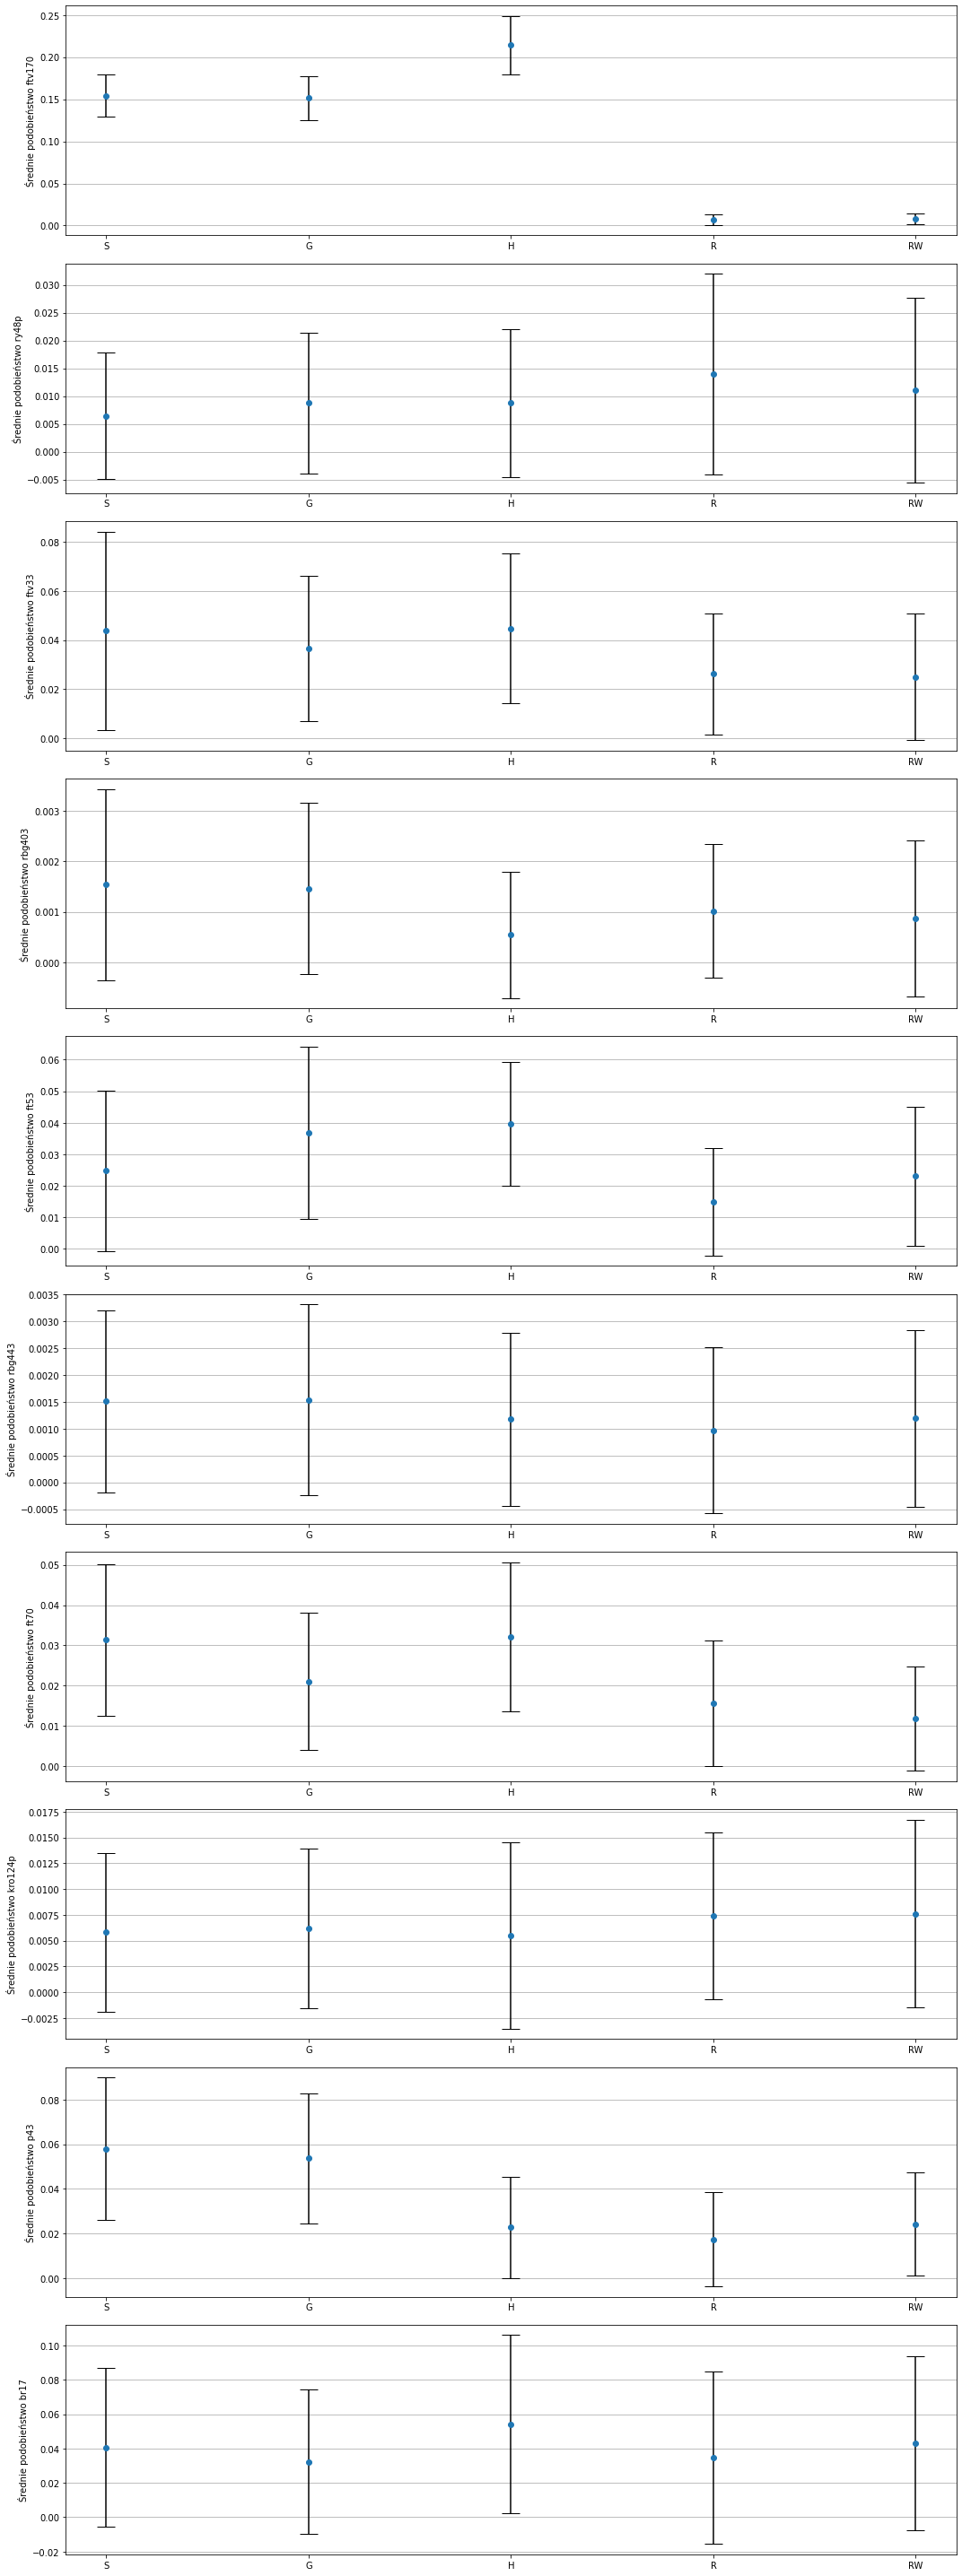

In [95]:
set_n= "ftv170"
fig, ax = plt.subplots(10,figsize=(15,40))
i=0
for set_n in set_names:
    data = dict_for_sets[set_n]
    mean_for_algs = {}
    std_for_algs = {}
    alg_s = ["S","G","H","R","RW"]
    x_pos = np.arange(len(alg_names))
    CTEs = []
    error = []

    for alg in alg_names:
        error.append(np.std(data[alg], ddof=1))
        CTEs.append(np.mean(data[alg]))

    # print("MEAN:", mean_for_algs)
    # print("STD:", std_for_algs)

    ax[i].errorbar(x_pos, CTEs, yerr=error, ecolor='black',fmt='o', capsize=10)
    ax[i].set_ylabel('Średnie podobieństwo {0}'.format(set_n))
    ax[i].set_xticks(x_pos)
    ax[i].set_xticklabels(alg_s)
    ax[i].yaxis.grid(True)
    i+=1
  

# Save the figure and show
plt.tight_layout()
plt.savefig('../results/zad5_errors_all.pdf')


plt.show()



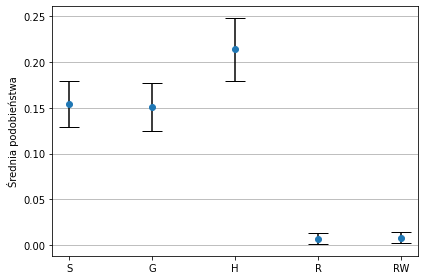

In [97]:
set_n= "ftv170"
data = dict_for_sets[set_n]
mean_for_algs = {}
std_for_algs = {}
alg_s = ["S","G","H","R","RW"]
x_pos = np.arange(len(alg_names))
CTEs = []
error = []

for alg in alg_names:
    error.append(np.std(data[alg], ddof=1))
    CTEs.append(np.mean(data[alg]))
    
# print("MEAN:", mean_for_algs)
# print("STD:", std_for_algs)

fig, ax = plt.subplots()
ax.errorbar(x_pos, CTEs, yerr=error, ecolor='black',fmt='o', capsize=10)
ax.set_ylabel('Średnia podobieństwa')
ax.set_xticks(x_pos)
ax.set_xticklabels(alg_s)
ax.yaxis.grid(True)
  
# Save the figure and show
plt.tight_layout()
plt.savefig('../results/zad5_errors_{0}.pdf'.format(set_n))
plt.show()



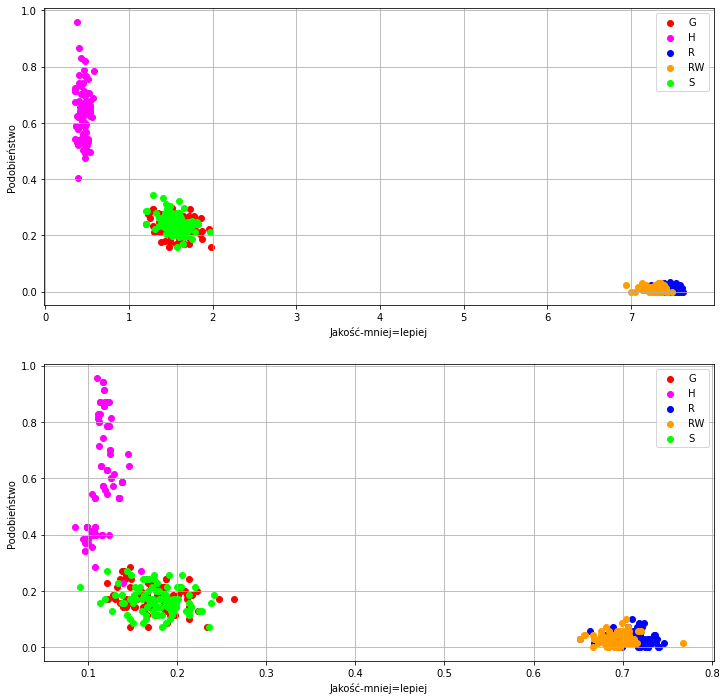

In [29]:
set_name1= "ftv170"
data_p1 = data_df.loc[data_df['setName'] == set_name1]

set_name2= "ft70"
data_p2 = data_df.loc[data_df['setName'] == set_name2]


fig, axs = plt.subplots(2,figsize=(12,12))

# fig.suptitle('Podobieństwo dla setów: {0} oraz {1}'.format(set_name1,set_name2))
axs[0].scatter(x=data_p1.loc[data_p1['algName'] == 'Greedy']['quality']
           ,y=data_p1.loc[data_p1['algName'] == 'Greedy']['similarity'],color='#ff0000'
           ,label = "G"
           )
axs[0].scatter(x=data_p1.loc[data_p1['algName'] == 'SimpleHeur']['quality']
           ,y=data_p1.loc[data_p1['algName'] == 'SimpleHeur']['similarity'],color='#ff00fb'
           ,label = "H"
           )

axs[0].scatter(x=data_p1.loc[data_p1['algName'] == 'Random']['quality']
           ,y=data_p1.loc[data_p1['algName'] == 'Random']['similarity'],color='#0004ff'
           ,label = "R"
           )
axs[0].scatter(x=data_p1.loc[data_p1['algName'] == 'RandomWalk']['quality']
           ,y=data_p1.loc[data_p1['algName'] == 'RandomWalk']['similarity'],color='#ff9d00'
           ,label = "RW"
           )
axs[0].scatter(x=data_p1.loc[data_p1['algName'] == 'Steepest']['quality']
           ,y=data_p1.loc[data_p1['algName'] == 'Steepest']['similarity'],color='#04ff00'
           ,label = "S"
           )


axs[0].legend(loc="upper right")
axs[0].grid()
axs[0].set_xlabel('Jakość-mniej=lepiej')
axs[0].set_ylabel('Podobieństwo')

axs[1].scatter(x=data_p2.loc[data_p2['algName'] == 'Greedy']['quality']
           ,y=data_p2.loc[data_p2['algName'] == 'Greedy']['similarity'],color='#ff0000'
           ,label = "G"
           )
axs[1].scatter(x=data_p2.loc[data_p2['algName'] == 'SimpleHeur']['quality']
           ,y=data_p2.loc[data_p2['algName'] == 'SimpleHeur']['similarity'],color='#ff00fb'
           ,label = "H"
           )

axs[1].scatter(x=data_p2.loc[data_p2['algName'] == 'Random']['quality']
           ,y=data_p2.loc[data_p2['algName'] == 'Random']['similarity'],color='#0004ff'
           ,label = "R"
           )
axs[1].scatter(x=data_p2.loc[data_p2['algName'] == 'RandomWalk']['quality']
           ,y=data_p2.loc[data_p2['algName'] == 'RandomWalk']['similarity'],color='#ff9d00'
           ,label = "RW"
           )
axs[1].scatter(x=data_p2.loc[data_p2['algName'] == 'Steepest']['quality']
           ,y=data_p2.loc[data_p2['algName'] == 'Steepest']['similarity'],color='#04ff00'
           ,label = "S"
           )

axs[1].legend(loc="upper right")
axs[1].grid()
axs[1].set_xlabel('Jakość-mniej=lepiej')
axs[1].set_ylabel('Podobieństwo')
# fig.savefig("../results/zad5-Podobienstwo-both-100.pdf", bbox_inches='tight')

In [244]:
# set_name= "ftv170"
# data_p1 = data_df.loc[data_df['setName'] == set_name]

# # data_p1.loc[data_p1['list_pairs'] == best_results_for_set[set_name]]
# # data_p1 = data_p1[data_p1.list_pairs != best_results_for_set[set_name]]

# plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(x=data_p1['quality']
#             ,y=data_p1['similarity']
#             ,color='C1'
#             ,label = set_name
#            )

# plt.xlabel('Jakość-mniej=lepiej')
# plt.ylabel('Podobieństwo')
# plt.legend()
# plt.grid()
# plt.savefig("../results/zad5-Podobienstwo-ftv170-100.pdf", bbox_inches='tight')

# plt.show()


In [12]:
# set_name= "ft70"
# data_p1 = data_df.loc[data_df['setName'] == set_name]

# # data_p1.loc[data_p1['list_pairs'] == best_results_for_set[set_name]]
# # data_p1 = data_p1[data_p1.list_pairs != best_results_for_set[set_name]]

# plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(x=data_p1['quality']
#             ,y=data_p1['similarity']
#             ,color='C0'
#             ,label = set_name
           
#            )

# plt.xlabel('Jakość-mniej=lepiej')
# plt.ylabel('Podobieństwo')
# plt.legend()
# plt.grid()
# plt.savefig("../results/zad5-Podobienstwo-ft70-100.pdf", bbox_inches='tight')

# plt.show()
alg_names

array(['Steepest', 'Greedy', 'SimpleHeur', 'Random', 'RandomWalk'],
      dtype=object)

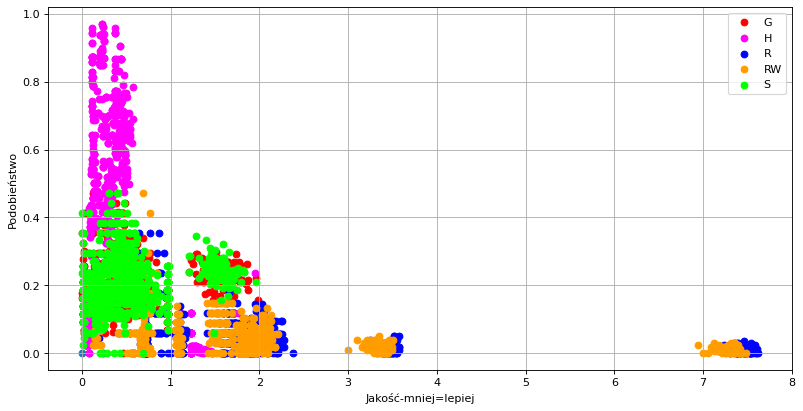

In [27]:
i = 0 
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(0,0)

# colors = c(G="#ff0000", S="#04ff00", R="#0004ff", RW="#ff9d00", H="#ff00fb")


plt.scatter(x=data_df.loc[data_df['algName'] == 'Greedy']['quality']
           ,y=data_df.loc[data_df['algName'] == 'Greedy']['similarity'],color='#ff0000'.format(i)
           ,label = "G"
           )
plt.scatter(x=data_df.loc[data_df['algName'] == 'SimpleHeur']['quality']
           ,y=data_df.loc[data_df['algName'] == 'SimpleHeur']['similarity'],color='#ff00fb'.format(i)
           ,label = "H"
           )

plt.scatter(x=data_df.loc[data_df['algName'] == 'Random']['quality']
           ,y=data_df.loc[data_df['algName'] == 'Random']['similarity'],color='#0004ff'.format(i)
           ,label = "R"
           )
plt.scatter(x=data_df.loc[data_df['algName'] == 'RandomWalk']['quality']
           ,y=data_df.loc[data_df['algName'] == 'RandomWalk']['similarity'],color='#ff9d00'.format(i)
           ,label = "RW"
           )
plt.scatter(x=data_df.loc[data_df['algName'] == 'Steepest']['quality']
           ,y=data_df.loc[data_df['algName'] == 'Steepest']['similarity'],color='#04ff00'.format(i)
           ,label = "S"
           )

# for alg in alg_names:

#     i+=1
plt.xlabel('Jakość-mniej=lepiej')
plt.ylabel('Podobieństwo')
plt.legend()
plt.grid()
# plt.savefig("../results/zad5-Podobienstwo-all-10.pdf", bbox_inches='tight')

plt.show()


In [ ]:
end_list

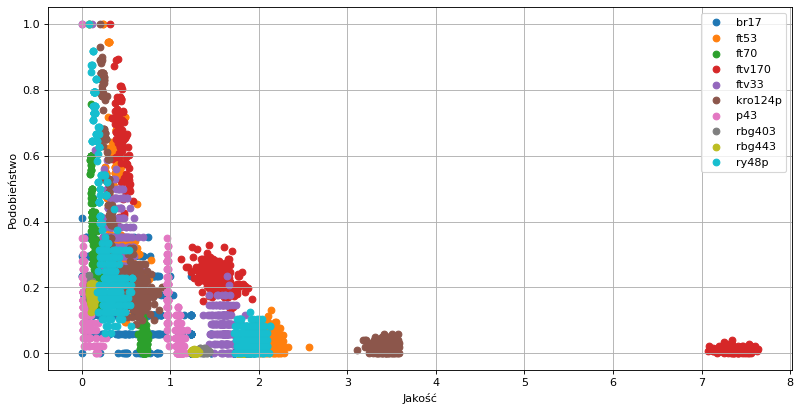

In [97]:
data_p1 = data_df
i = 0 
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(0,0)
for setN in set_names:
    plt.scatter(x=data_p1.loc[data_p1['setName'] == setN]['quality']
                ,y=data_p1.loc[data_p1['setName'] == setN]['similarity'],color='C{}'.format(i)
                ,label = setN
               )
    i+=1
plt.xlabel('Jakość')
plt.ylabel('Podobieństwo')
plt.legend()
plt.grid()
plt.show()

In [185]:
[4,3] in [[3,4],[5,4]]

False